# Import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
from matplotlib.ticker import FuncFormatter

# Chargement

In [88]:
data = pd.read_excel('data/Online Retail.xlsx')

# Exploration

## Générale

In [89]:
print("Premières transactions : ")
data.head()

Premières transactions : 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [90]:
print("Nb de transactions, nb de features : ")
data.shape

Nb de transactions, nb de features : 


(541909, 8)

In [91]:
print("Info générales : ")
data.info()

Info générales : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [92]:
print("Description des colonnes numériques : ")
data.describe()

Description des colonnes numériques : 


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [93]:
print("Valeurs manquantes : ")
data.isnull().sum()

Valeurs manquantes : 


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Produits - StockCode

In [94]:
counts = data['StockCode'].value_counts()
plus_de_25 = counts[counts > 25]

print(f"Nb de produits total : {counts.shape[0]}")
print(f"Nb de produits total ayant +25 transactions : {plus_de_25.shape[0]}")

Nb de produits total : 4070
Nb de produits total ayant +25 transactions : 2719


## Clients - CustomerID

In [95]:
counts = data['CustomerID'].value_counts()
plus_de_25 = counts[counts > 25]

print(f"Nb de clients total : {counts.shape[0]}")
print(f"Nb de clients total ayant +25 transactions : {plus_de_25.shape[0]}")

Nb de clients total : 4372
Nb de clients total ayant +25 transactions : 2837


## Date de facture - InvoiceDate

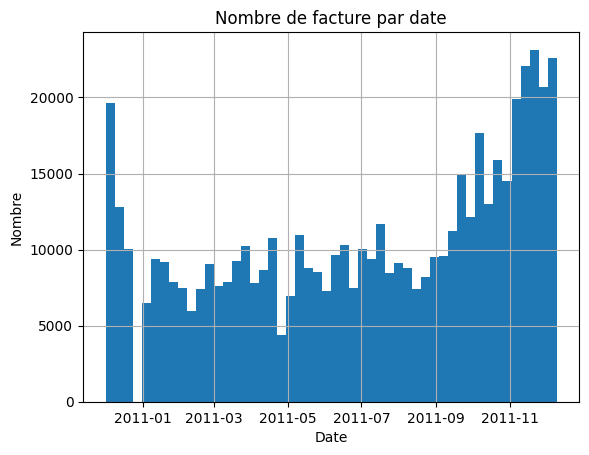

In [96]:
data['InvoiceDate'].hist(bins=50)
plt.title("Nombre de facture par date")
plt.xlabel("Date")
plt.ylabel("Nombre")
plt.show()

## Pays - Country

In [97]:
data['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


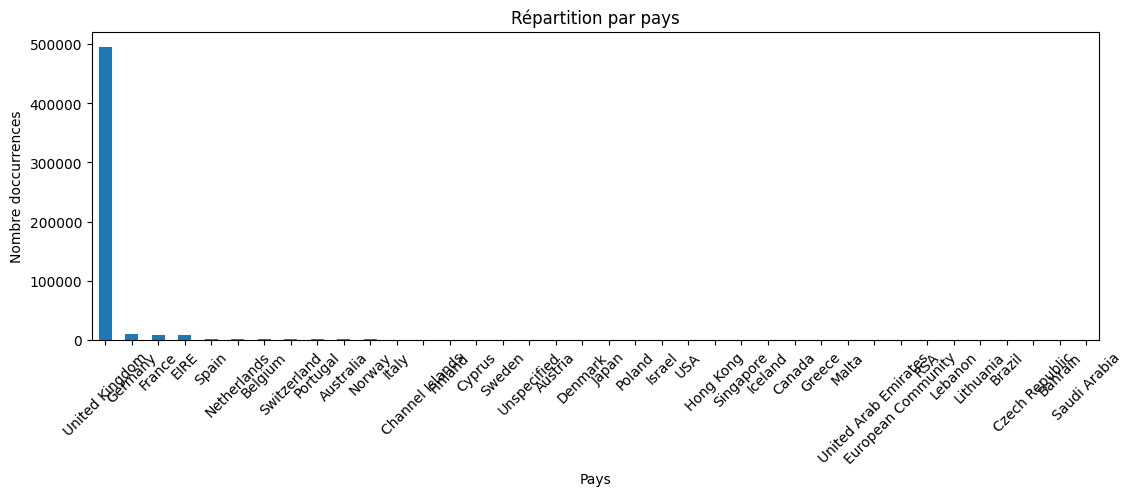

In [98]:

data['Country'].value_counts().plot(kind='bar', figsize=(13,4))
plt.title('Répartition par pays')
plt.xlabel('Pays')
plt.ylabel('Nombre d''occurrences')
plt.xticks(rotation=45)
plt.show()

# Transformation de type

## Clients - CustomerID

Les id clients sont chargés au format float. Cela est étrange étant donné que ce sont censé être des ints.  
Je vais vérifier ci-dessous si certain possède des décimales.

In [99]:
print("CustomerID avec décimales : ")
data['CustomerID'][data['CustomerID'] % 1 != 0].unique()

CustomerID avec décimales : 


array([nan])

Il n'y a finalement pas de client avec décimal, nous allons donc caster en int.

In [100]:
data['CustomerID'] = data['CustomerID'].fillna(0).astype(int)

In [101]:
data['CustomerID']

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 541909, dtype: int64

# Valeurs aberrante

## Quantity

Nous avons remarquer dans l'exploration que les quantités pouvais être inférieur à 0.

In [102]:
# Filtrer les lignes où Quantity < 0
negatives = data[data['Quantity'] < 0]
negatives

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


Hypothèse : la source de donnéee précise que des annulations sont présentes. Elles sont caractérisée par un début de code InvoiceNo à C. A première vue, les quantités inférieur à 0 pourrait correspondre à des annulations.

In [103]:
# Extraire le premier caractère de chaque InvoiceNo
premiers_caracteres = negatives['InvoiceNo'].astype(str).str[0]
print(premiers_caracteres.unique())

['C' '5']


Il y a effectivement des C mais aussi des 5 !

In [104]:
# Filtrer les lignes avec Quantity < 0 ET InvoiceNo qui commence par '5'
data[(data['Quantity'] < 0) & (data['InvoiceNo'].astype(str).str.startswith('5'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,0,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,0,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,0,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,0,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,0,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,0,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,0,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,0,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,0,United Kingdom


Nous remarquons l'absence de description ou des descriptions mentionnant des évènements autres que des ventes.  
Je vais ci-dessous prendre un exemple pour voir toutes les factures (dont des factures annulés) d'un client pour un produit.

In [105]:
data[(data['CustomerID'] == 15311) & (data['StockCode'] == '35004C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311,United Kingdom
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-08 13:18:00,4.65,15311,United Kingdom
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-13 15:07:00,4.65,15311,United Kingdom
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20 15:27:00,4.65,15311,United Kingdom
44157,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-05 11:41:00,4.65,15311,United Kingdom
59542,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-17 13:39:00,4.65,15311,United Kingdom
78333,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2011-02-01 12:14:00,4.65,15311,United Kingdom


Nous allons supprimer l'ensemble des quantités inférieur à 0.

In [106]:
data = data[data['Quantity'] >= 0]

In [107]:
print(data.shape)
print((data['Quantity'] < 0).sum())

(531285, 8)
0


## UnitPrice

Nous avons remarquer dans l'exploration des prix de facture inférieur et égal à 0.

In [108]:
data[data['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0,United Kingdom


In [109]:
zero = data[data['UnitPrice'] == 0]
zero

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,0,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,0,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,0,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,0,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,0,United Kingdom
...,...,...,...,...,...,...,...,...
535334,581211,22142,check,14,2011-12-07 18:36:00,0.0,0,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,0,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,0,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,0,United Kingdom


Qui sont les clients concernés par des factures à 0 ?  
Combien chaque clients ont-ils de factures ?

In [110]:
clients = zero['CustomerID']
print(clients.unique())

[    0 12647 16560 14911 13081 15107 17560 13239 13113 14410 12457 17667
 12415 16818 12507 15581 14646 16133 12748 15804 12446 18059 14110 12437
 12431 13014 13985 15602 12603 12444 16406 13256]


In [111]:
nb_clients = clients.nunique()
print("Nombre de clients uniques :", nb_clients)
clients.value_counts()

Nombre de clients uniques : 32


CustomerID
0        1139
13081       4
14646       4
14911       2
13985       2
12415       2
16560       1
15107       1
13239       1
13113       1
12457       1
14410       1
17667       1
16818       1
17560       1
12647       1
15581       1
12507       1
12748       1
16133       1
12446       1
18059       1
14110       1
15804       1
12437       1
12431       1
13014       1
15602       1
12603       1
12444       1
16406       1
13256       1
Name: count, dtype: int64

C'est majoritairement le client 0.

Nous allons supprimer l'ensemble des prix inférieur ou égal à 0

In [112]:
data = data[data['UnitPrice'] > 0]

In [113]:
print(data.shape)
print((data['UnitPrice'] <= 0).sum())

(530104, 8)
0


## CustomerID

Nous avons donc remarqué la récurrence d'un client ayant pour ID 0 mais qui est-il ?

In [114]:
data[data['CustomerID'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,0,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,0,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,0,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,0,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,0,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,0,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,0,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,0,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,0,United Kingdom


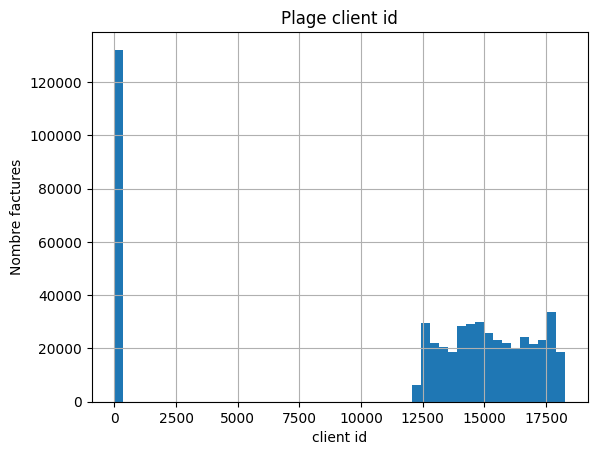

In [115]:
data['CustomerID'].hist(bins=50)
plt.title("Plage client id")
plt.xlabel("client id")
plt.ylabel("Nombre factures")
plt.show()

La source de données précise que le client est un nombre de 5 chiffres. Il n'est pas précisé qu'il peut être 0. Il ne s'agit probablement pas d'un seul client. Une hyptohèse me vient : peux-être ce sont des données qui ont été anonymisé !?  
Nous ne le savons pas, nous allons supprimer tous les clients égal à 0.

In [116]:
data = data[data['CustomerID'] != 0]

In [117]:
print(data.shape)
print((data['CustomerID'] == 0).sum())

(397884, 8)
0


## StockCode

In [118]:
# Fonction pour détecter si une valeur est un int (ou int-like)
def is_int(val):
    try:
        # Essaye de convertir en int
        int(val)
        return True
    except:
        return False

# Appliquer sur la colonne
is_int_mask = data['StockCode'].apply(is_int)

# Compter
nb_int = is_int_mask.sum()            # vrai = int
nb_str = (~is_int_mask).sum()         # faux = pas int (donc string ou autre)

print(f"Nombre de valeurs int-like : {nb_int}")
print(f"Nombre de valeurs non int (string/other) : {nb_str}")

Nombre de valeurs int-like : 363087
Nombre de valeurs non int (string/other) : 34797


In [119]:
data[is_int_mask == False]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France
...,...,...,...,...,...,...,...,...
541778,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713,Germany
541809,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581,United Kingdom
541838,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748,United Kingdom
541844,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748,United Kingdom


Nous allons supprimer les codes produits n'étant pas int car il est préciser que les codes produits sont censé avoir 5 chiffres

In [120]:
data = data[is_int_mask].copy()
data['StockCode'] = data['StockCode'].astype(int)

In [121]:
data.shape

(363087, 8)

# Exploration traité

In [122]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [123]:
print("Valeurs manquantes : ")
data.isnull().sum()

Valeurs manquantes : 


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Nouvelles colonnes

## Revenu

In [124]:
data['Revenu'] = data['UnitPrice'] * data['Quantity']

In [125]:
print(data['Revenu'].min())
print(data['Revenu'].max())

0.06
168469.6


## Réduction de la date - anneemois, mois, jour, semaine, joursemaine, nomjour

In [126]:
locale.setlocale(locale.LC_TIME, 'fr_FR.UTF-8')
data['AnneeMois'] = data['InvoiceDate'].dt.to_period('M')
data['Mois'] = data['InvoiceDate'].dt.month
data['Jour'] = data['InvoiceDate'].dt.day
data['Semaine'] = data['InvoiceDate'].dt.isocalendar().week
data['JourSemaine'] = data['InvoiceDate'].dt.dayofweek
data['NomJour'] = data['InvoiceDate'].dt.strftime('%A')

In [127]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenu,AnneeMois,Mois,Jour,Semaine,JourSemaine,NomJour
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,12,1,48,2,mercredi
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,2010-12,12,1,48,2,mercredi
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,2010-12,12,1,48,2,mercredi
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010-12,12,1,48,2,mercredi
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010-12,12,1,48,2,mercredi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12,12,9,49,4,vendredi
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12,12,9,49,4,vendredi
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,12,9,49,4,vendredi
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,12,9,49,4,vendredi


# Analyse

## Revenus par pays

In [128]:
revenus_par_pays = data.groupby('Country')['Revenu'].sum().sort_values(ascending=False)
print(revenus_par_pays)

Country
United Kingdom          6623368.43
Netherlands              269330.18
EIRE                     242698.34
Germany                  190201.94
France                   173532.12
Australia                134070.62
Switzerland               48109.33
Spain                     43046.19
Japan                     35975.17
Sweden                    35128.05
Belgium                   34840.58
Norway                    28841.68
Portugal                  25222.23
Channel Islands           18286.69
Denmark                   17044.87
Italy                     14707.22
Finland                   12036.11
Cyprus                    11826.98
Singapore                  8717.57
Austria                    7662.53
Israel                     6817.71
Poland                     6489.71
Greece                     4200.28
Iceland                    3653.45
USA                        3313.89
Canada                     2729.66
Unspecified                2546.48
United Arab Emirates       1799.38
Malta       

Quel pays génère le plus de revenus ?

In [129]:
pays_top = revenus_par_pays.idxmax()
revenu_max = revenus_par_pays.max()
print(f"Pays top : {pays_top} avec {revenu_max:.2f}£ de revenus")

Pays top : United Kingdom avec 6623368.43£ de revenus


## CA mensuel

In [130]:
revenus_par_mois = data.groupby('AnneeMois')['Revenu'].sum().sort_index()
revenus_par_mois.index = revenus_par_mois.index.astype(str) # Empecher le formattage auto
print(revenus_par_mois)

AnneeMois
2010-12     504309.40
2011-01     497482.21
2011-02     396318.22
2011-03     526068.40
2011-04     405226.48
2011-05     599736.66
2011-06     603411.25
2011-07     531686.30
2011-08     580852.33
2011-09     878833.62
2011-10     939738.89
2011-11    1057634.25
2011-12     494051.53
Name: Revenu, dtype: float64


In [131]:
def format_with_spaces(x, _):
    return f"{int(x):,}".replace(",", " ")

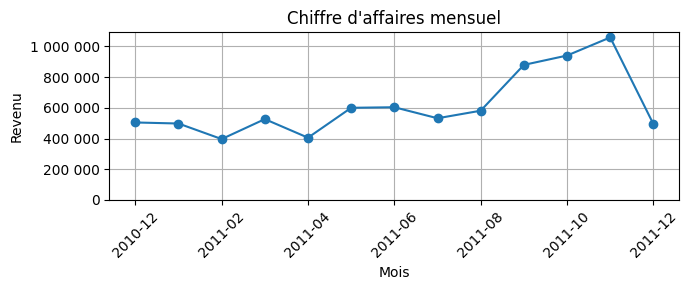

In [132]:
revenus_par_mois.plot(kind='line', marker='o', figsize=(7, 3))
plt.title("Chiffre d'affaires mensuel")
plt.xlabel("Mois")
plt.ylabel("Revenu")
plt.grid(True)

plt.ylim(bottom=0)
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_spaces))

plt.tight_layout()
plt.show()

## Top 10 clients

In [133]:
top_clients = data.groupby('CustomerID')['Revenu'].sum().sort_values(ascending=False).head(10)
print(top_clients)

CustomerID
14646    265106.92
18102    253922.76
17450    180847.03
16446    168472.50
14911    125544.35
12415    121265.99
14156    113198.66
17511     80952.39
12346     77183.60
16029     65153.49
Name: Revenu, dtype: float64


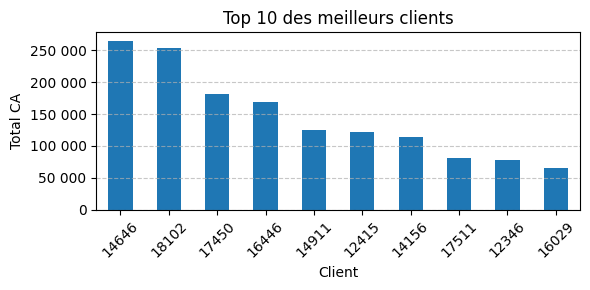

In [134]:
top_clients.plot(kind='bar', figsize=(6,3))

plt.title("Top 10 des meilleurs clients")
plt.xlabel("Client")
plt.ylabel("Total CA")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_spaces))
plt.tight_layout()
plt.show()

## Top 10 produits les + vendus

In [135]:
produits_tops_detail = data.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(10)
print(produits_tops_detail)

StockCode  Description                       
23843      PAPER CRAFT , LITTLE BIRDIE           80995
23166      MEDIUM CERAMIC TOP STORAGE JAR        77916
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
84879      ASSORTED COLOUR BIRD ORNAMENT         35362
21212      PACK OF 72 RETROSPOT CAKE CASES       33693
22197      POPCORN HOLDER                        30931
23084      RABBIT NIGHT LIGHT                    27202
22492      MINI PAINT SET VINTAGE                26076
22616      PACK OF 12 LONDON TISSUES             25345
21977      PACK OF 60 PINK PAISLEY CAKE CASES    24264
Name: Quantity, dtype: int64


## Jour de la semaine les plus actifs

In [136]:
ventes_par_jour = data.groupby('NomJour')['Revenu'].sum().sort_values(ascending=False)
print(ventes_par_jour)

NomJour
jeudi       1779385.88
mardi       1538127.41
mercredi    1421640.06
vendredi    1359019.69
lundi       1202417.95
dimanche     714758.55
Name: Revenu, dtype: float64


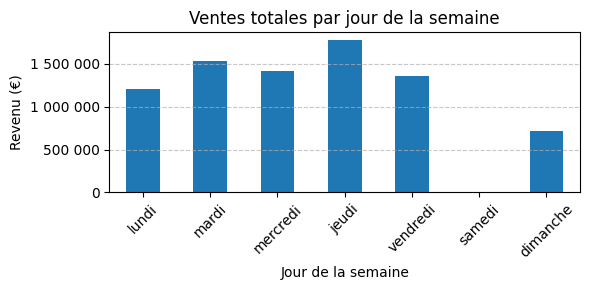

In [137]:
ordre_jours = ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']

ventes_par_jour = ventes_par_jour.reindex(ordre_jours)

ventes_par_jour.plot(kind='bar', figsize=(6,3))

plt.title("Ventes totales par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Revenu (€)")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_spaces))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Revenus par pays et par mois

In [138]:
pivot = data.pivot_table(
    values='Revenu',
    index='Country',
    columns='AnneeMois',
    aggfunc='sum',
    fill_value=0
)

In [139]:
pivot

AnneeMois,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
Country,,,,,,,,,,,,,
Australia,901.70,8858.71,14379.07,16911.09,405.00,12460.92,24193.65,4814.55,22284.80,5014.78,17068.63,6777.72,0.00
Austria,157.20,0.00,418.86,1308.12,455.18,932.88,0.00,882.75,1324.68,0.00,857.38,1159.28,166.20
Bahrain,0.00,0.00,0.00,0.00,0.00,452.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Belgium,1502.70,998.75,1724.05,2740.21,1621.87,2394.36,3625.14,2052.57,2922.82,3561.92,4908.90,5611.26,1176.03
Brazil,0.00,0.00,0.00,0.00,1069.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Canada,0.00,0.00,0.00,130.64,0.00,534.24,1069.86,943.36,51.56,0.00,0.00,0.00,0.00
Channel Islands,313.53,665.08,1784.71,3290.43,243.00,914.24,1842.23,0.00,4045.03,1306.75,2383.72,1299.57,198.40
Cyprus,1363.67,522.30,3636.60,880.01,0.00,0.00,1088.52,0.00,0.00,0.00,3915.47,420.41,0.00
Czech Republic,0.00,0.00,427.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,237.48,0.00,0.00


# Exports

In [140]:
data.to_csv('outputs/data_cleaned.csv', index=False, encoding='utf-8')

In [141]:
data.to_parquet('outputs/data_cleaned.parquet', index=False)

In [142]:
revenus_par_mois.to_json('outputs/monthly_revenue.json', orient='index', date_format='iso')

In [143]:
pivot.to_csv('outputs/country_month_revenue.csv', encoding='utf-8')